In [8]:
import torch
import numpy as np
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from utils.vis_utils import *

# plotting params
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# for reloading modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# define transforms to be applied to dataset
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
]) 

# download train and test
trainset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=True, 
                                        download=True,
                                        transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False, 
                                       download=True,
                                       transform=transform)

# load train
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=9, 
                                          shuffle=True, 
                                          num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [17]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [18]:
X = images.numpy()
X = np.transpose(X, [0, 2, 3, 1])
print(X.shape)

(9, 32, 32, 3)


In [27]:
np.mean(X[0], axis=2).shape

(32, 32)

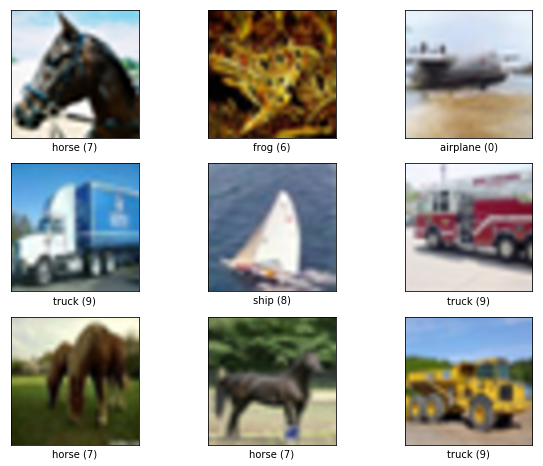

In [9]:
plot_images(X, labels)